# IC Photography Styles

# Data Preprocessing

## Setting Up Necessary Things

In [34]:
# Jupyter Notebook Magic Command - Auto Reloading
%reload_ext autoreload
%autoreload 2

# Jupyter Notebook Magic Command - Inline Plotting
%matplotlib inline

# Batch Size
bs = 8

# Version
version = 0

In [2]:
# Ignore All Warnings
import warnings
warnings.filterwarnings("ignore")

## Necessary Imports

In [3]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

## Collecting Photographic Styles Images

### Photographic Styles Types

In [4]:
# Photographic Styles Types
pst_labels = {
    "Natural World Photography": [
        "Nature or Landscape Photography",
        "Wildlife Photography",
        "Underwater Photography",
        "Astrophotography",
        "Storm Photography",
        "Pet Photography",
        "Macro Photography",
        "Flower Photography"
    ],
    "Cityscapes and Structures Photography": [
        "Architecture Photography",
        "Real estate Photography",
        "Aerial or Drone Photography"
    ],
    "People Photography": [
        "Portrait Photography",
        "Event Photography",
        "Headshot Photography",
        "Fashion Photography",
        "Sports Photography",
        "Documentary Photography"
    ],
    "Lifestyle Photography": [
        "Street Photography",
        "Wedding Photography"
    ],
    "Commercial Photography": [
        "Food Photography",
        "Product Photography"
    ],
    "Artistic Photography": [
        "Still Life Photography",
        "Black and White Photography",
        "Fine Art Photography",
        "Double Exposure Photography",
        "Surreal Photography",
        "Abstract Photography"
    ]
}

print("Total Number of Photographic Styles Genres: ", len(pst_labels))
print("Total Number of Photographic Styles Types: ", sum(len(pst_label) for pst_label in pst_labels.values()))

Total Number of Photographic Styles Genres:  6
Total Number of Photographic Styles Types:  27


### Documentation of Necessary Functions
Images from `Google Image Search` and `Bing Image Search` can be downloaded. The `DuckDuckGo Image Search` will be used. We can accomplish this using a function in `Fastai`.

In [5]:
# Doc search_images_ddg
doc(search_images_ddg)

In [6]:
# Doc download_url
doc(download_url)

In [21]:
# Doc get_image_files
doc(get_image_files)

In [32]:
# Doc aug_transforms
doc(aug_transforms)

### Demo Image Search and Test

In [7]:
# Search Images Demo
pst_images = search_images_ddg(pst_labels["Natural World Photography"][0])
print(f"Number of collected Images: {len(pst_images)}")
print(f"First Collected Image URL: {pst_images[0]}")

Number of collected Images: 200
First Collected Image URL: https://wallup.net/wp-content/uploads/2016/01/132930-nature-landscape-flowers.jpg


In [8]:
# Download the Image Demo
dest = "../demo_data/nature_or_landscape_photography.jpg"
download_url(pst_images[0], dest, show_progress=True)

Path('../demo_data/nature_or_landscape_photography.jpg')

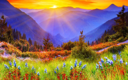

In [9]:
# Open the Image
image = Image.open(dest)
image.to_thumb(128, 128)

### Search and Download Images 

In [10]:
data_path = "../data"


if not os.path.exists(data_path):
    os.mkdir(data_path)

for pst_genre in pst_labels:
    print(f"--- {pst_genre} ---")
    genre_folder = f"{data_path}/{pst_genre}"
    if not os.path.exists(genre_folder):
        os.mkdir(genre_folder)

    for pst_type in pst_labels[pst_genre]:
        type_folder = f"{genre_folder}/{pst_type}"
        if not os.path.exists(type_folder):
            os.mkdir(type_folder)

        try:
            pst_image_urls = search_images_ddg(pst_type, max_images=250)
            print(f"    {pst_type}: {len(pst_image_urls)}")
            download_images(type_folder, urls=pst_image_urls)
            print("                 Download DONE!")
        except:
            continue

--- Natural World Photography ---
    Nature or Landscape Photography: 250
                 Download DONE!
    Wildlife Photography: 250
                 Download DONE!
    Underwater Photography: 250
                 Download DONE!
    Astrophotography: 250
                 Download DONE!
    Storm Photography: 250
                 Download DONE!
    Pet Photography: 250
                 Download DONE!
    Macro Photography: 250
                 Download DONE!
    Flower Photography: 250
                 Download DONE!
--- Cityscapes and Structures Photography ---
    Architecture Photography: 250
                 Download DONE!
    Real estate Photography: 250
                 Download DONE!
    Aerial or Drone Photography: 250
                 Download DONE!
--- People Photography ---
    Portrait Photography: 250
                 Download DONE!
    Event Photography: 250
                 Download DONE!
    Headshot Photography: 250
                 Download DONE!
    Fashion Photog

In [17]:
# Total Image Count
image_count = get_image_files(data_path)
print("Total Image Count: ", len(image_count))

Total Image Count:  6232


In [18]:
# Failed Images
failed_images = verify_images(image_count)
print("Failed Image Count: ", len(failed_images))

Failed Image Count:  435


In [19]:
# Remove Failed Images
failed_images.map(Path.unlink)
print("Removed Failed Images..!")

Removed Failed Images..!


### Generate DataLoader from the Data

In [24]:
# Generate Data Container
pst_dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                          # returning a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),    # getting 90-10 train-validation split
    get_y=parent_label,                                 # taking the folder name as labels
    item_tfms=Resize(128)                               # resizing to get the image of same shape
)

In [26]:
# Create DataLoader
pst_dls = pst_dblock.dataloaders(data_path, bs=bs)      # setting up batch size for efficient GPU use

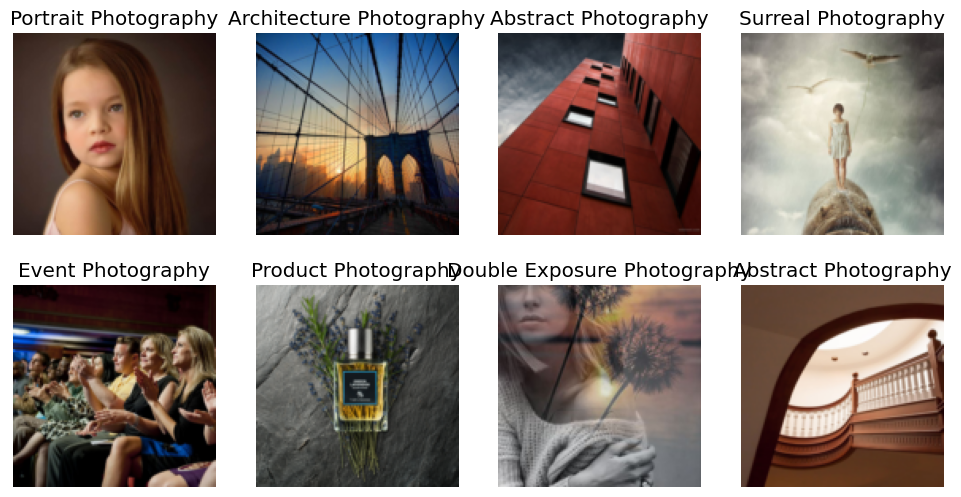

In [27]:
# Show Some Train Data
pst_dls.train.show_batch(max_n=8, nrows=2)

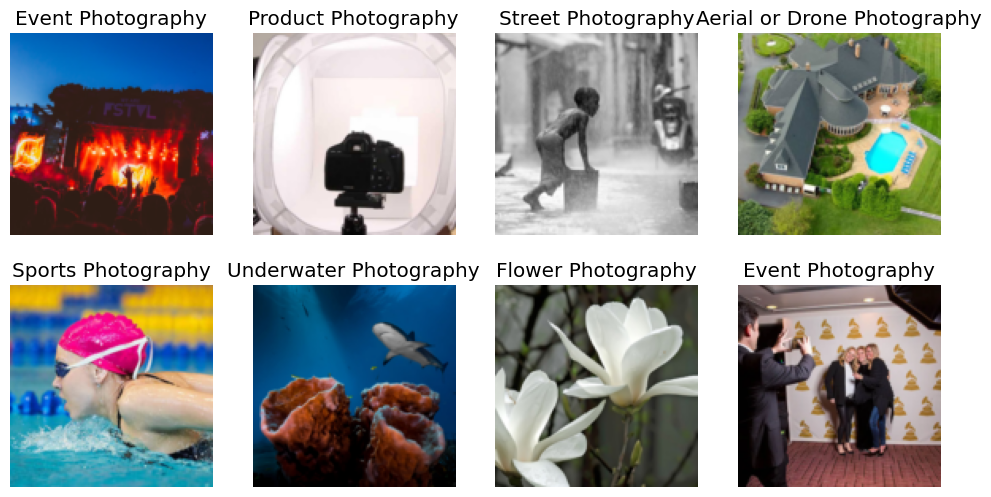

In [28]:
# Show Some Valid Data
pst_dls.valid.show_batch(max_n=8, nrows=2)

## Data Augmentation

### Squish Image

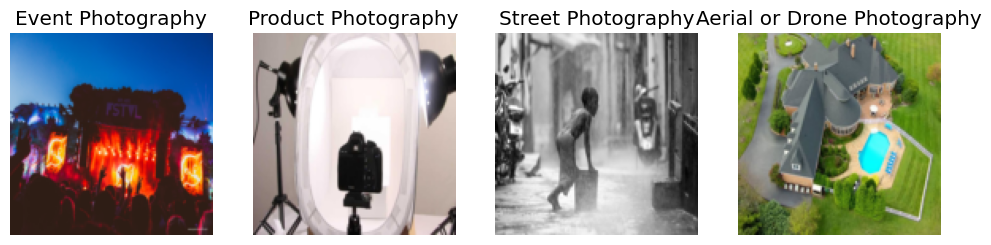

In [29]:
# Squishing The Whole Image Into (128 X 128) Size
pst_dblock = pst_dblock.new(item_tfms=Resize(128, ResizeMethod.Squish))

pst_dls = pst_dblock.dataloaders(data_path)

pst_dls.valid.show_batch(max_n=4, nrows=1)

### Padding Image

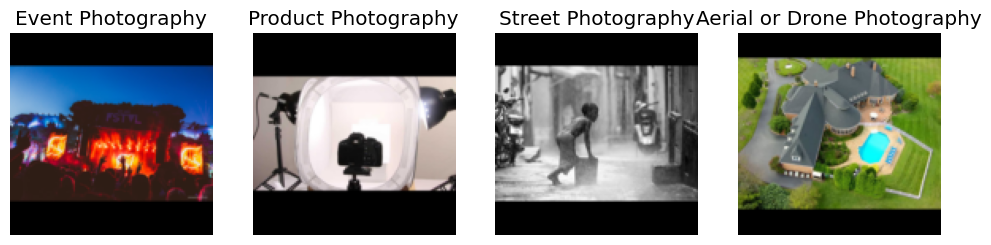

In [30]:
# Padding The Extra Space of The Whole Image Into (128 X 128) Size Without Squishing
pst_dblock = pst_dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode="zeros"))

pst_dls = pst_dblock.dataloaders(data_path)

pst_dls.valid.show_batch(max_n=4, nrows=1)

### Random Format Image

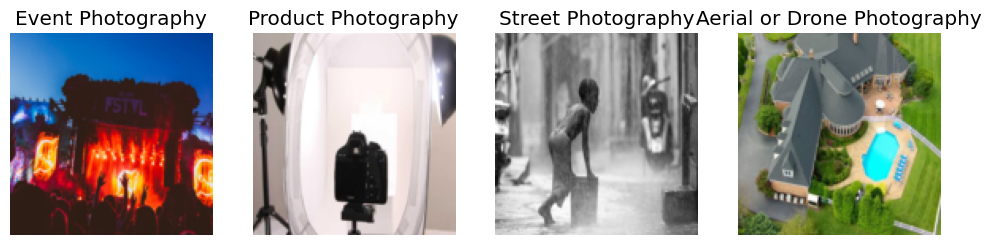

In [31]:
# Randomly Cropping, Cutting, Resizing and Coloring Parts of Images into (128 X 128) Size
pst_dblock = pst_dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))

pst_dls = pst_dblock.dataloaders(data_path)

pst_dls.valid.show_batch(max_n=4, nrows=1)

### Augmentation Image

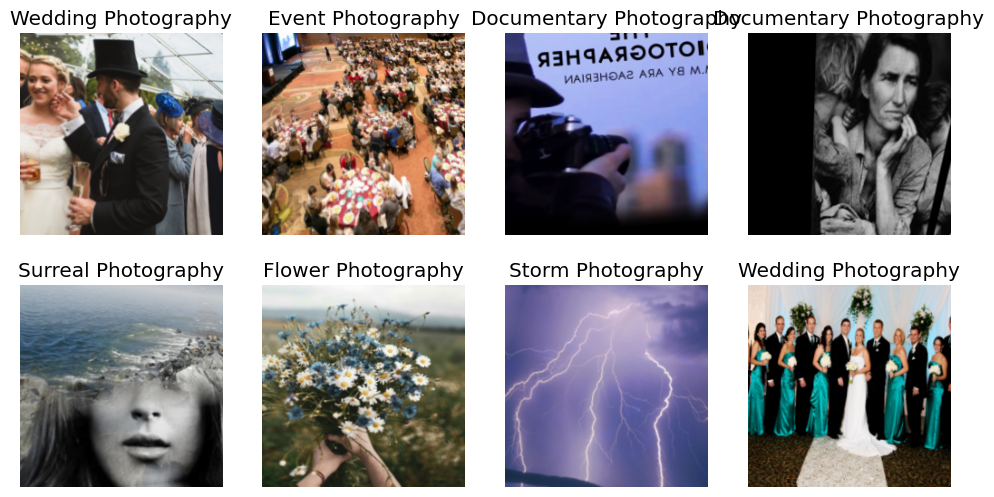

In [33]:
# RandomResizeCrop and Image Augmentation
pst_dblock = pst_dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())

pst_dls = pst_dblock.dataloaders(data_path)

pst_dls.train.show_batch(max_n=8, nrows=2)

## Create and Save PKL file

In [36]:
pkl_path = "../dataloaders"

if not os.path.exists(pkl_path):
    os.mkdir(pkl_path)

torch.save(pst_dls, f"{pkl_path}/pst_dataloader_v{version}.pkl")